# Random Forest Classifier

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

from sklearn.tree import export_graphviz
from IPython.display import Image
import pydot

In [2]:
#Create dummy features and targets
features, targets = make_classification(n_samples=1000, 
                                        n_classes=2,
                                        n_features=6,
                                        random_state=4)

In [3]:
#Check the data
print(features[:2])
print("#________________")
print(targets[:2])

[[ 1.92370023 -0.17175693 -0.71939131  1.24741313  0.86071677  2.96766967]
 [-0.42566647 -1.47358284  0.46724123  0.6216541   0.14999266  0.1115699 ]]
#________________
[0 1]


In [4]:
#Split into train and test sets
train_x = features[:800]
train_y = targets[:800]

test_x = features[800:]
test_y = targets[800:]

In [5]:
#Create the classifier
rf_clf = RandomForestClassifier(n_estimators=10,      # Number of trees
                                max_depth=None,       # How deep the trees are
                                min_samples_split=2,  # Minumum samples to split a node
                                min_samples_leaf=1,    # Minimum samples to be a leaf
                                criterion="gini",
                                max_features="auto"
                               )

#Train the classifier
rf_clf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
predictions = rf_clf.predict(test_x)
probabilities = rf_clf.predict_proba(test_x)

In [7]:
top = 10
print(predictions[:top])
print(test_y[:top])

[1 1 0 1 1 0 1 0 1 1]
[1 1 0 1 1 0 1 0 1 1]


In [8]:
probabilities[:10]

array([[0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.1, 0.9],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.3, 0.7],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ]])

In [9]:
print(rf_clf.feature_importances_)

[0.09186774 0.03931384 0.04546644 0.57252474 0.1527104  0.09811683]


# Single decision tree

In [10]:
tree_clf = DecisionTreeClassifier(max_depth=None,
                                  min_samples_split=2,  # Minumum samples to split a node
                                  min_samples_leaf=1    # Minimum samples to be a leaf
                                 )

tree_clf.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
predictions = tree_clf.predict(test_x)
probabilities = tree_clf.predict_proba(test_x)

In [12]:
top = 10
print(predictions[:top])
print(test_y[:top])

[1 1 0 1 0 1 0 0 1 1]
[1 1 0 1 1 0 1 0 1 1]


# Tree visualisation

In [13]:
tree_clf2 = DecisionTreeClassifier(max_depth=3)

tree_clf2.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

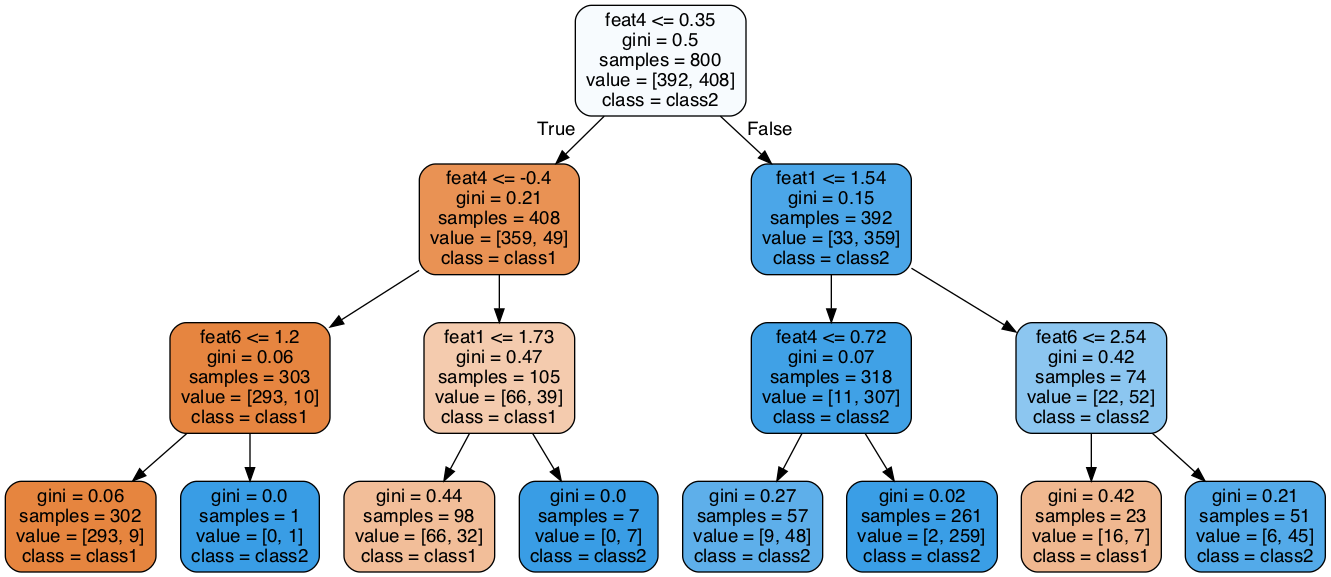

In [14]:
export_graphviz(tree_clf2, out_file='tree.dot', 
                feature_names = ["feat1", "feat2", "feat3", "feat4", "feat5", "feat6"],
                class_names = ["class1", "class2", "class3"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

Image(filename='tree.png')

In [15]:
feat1 = 1
feat2 = 2
feat3 = 3
feat4 = 0.2
feat5 = 5
feat6 = 6
test = [feat1, feat2, feat3, feat4, feat5, feat6]

print(tree_clf2.predict([test]))
print(tree_clf2.predict_proba([test]))

[0]
[[0.67346939 0.32653061]]


In [19]:
calculate_gini_impurity(293, 10)

0.06382816499471722

# Gini impurity

$G_{imp} = 1-\sum_{i=1}^{N}P_{i}^2$

In [18]:
def calculate_gini_impurity(a, b):
    pa = a / (a + b)
    pb = b / (a + b)
    gini_inpurity = 1 - pa**2 - pb**2
    return gini_inpurity

blue = 9
red = 1
calculate_gini_impurity(blue, red)

0.17999999999999994